In [1]:
include("./SuperLattice.jl")

Main.SuperLattice

In [2]:
using .SuperLattice
using LaTeXStrings
using Plots

pyplot()

Plots.PyPlotBackend()

# Studies of analytic and numeric ground energy $E_0$
The Hamiltonian of the full model is in the form
$$\hat{H}=\sum_{j}(I_j-\delta)\hat{\sigma}_{j}^x-\Omega\sum_{j}\hat{\sigma}_{j}^{z}+\sum_{j}\frac{V_j}{4}\hat{\sigma}_{j}^{x}\hat{\sigma}_{j+1}^{x}+\sum_{j}\frac{V_3}{4}\hat{\sigma}_{j}^{x}\hat{\sigma}_{j+2}^{x},$$
in which $V_j=V_1(\text{or}\ V_2)$ for odd (or even) $j$'s and all $\hat{\sigma}$'s are $1/2$ spin operators.

In this note we will assume $(I_j-\delta)=0$ always. With approximation in which omitting all the triple fermionic operator interactions after Jordan-Wigner transformation, a closed formula for spectrum of the Hamiltonian can be acheived in the form
$$\epsilon_{k}=\pm\sqrt{[(V_1+V_2)\sin(k)+V_{3}\sin(2k)]^2+[8\Omega+(V_1+V_2)\cos(k)+V_{3}\cos(2k)]^2}.$$

The true global ground state energy $E_{0}$ is therefore in the form (given the fact that we assume $N$ is always even)
$$E_{0}=-\sum_{k>0}^{\text{ABC}}\epsilon_{k},$$
in which $k\in\{k=\pm\frac{(2n-1)\pi}{L}|n=1,...,\frac{L}{2}\}$.

# The studies of spectrum gap
Here we will first assume that the interaction is negative (i.e., $C_6 < 0$). We will first study the correlations when $h_x=0$

## Assuming $a/l=1/2$
Here we plot the spectrum gap with respect to $h_z$. Here we assume $l=4$ and $a=2$. From the graph, we can obviously observe that the system in this setup undergoes a phase transition as $h_z$ increases. It's interesting that it seems like as $h_z$ increases the energy of the first excited state can be arbitrarily higher than that of the ground state.

In [8]:
hzs = 0.1:0.1:10
diffs_lst = []

@time for hz in hzs
    vals, vecs = generate_eigs(N=12, hx=0, hz=hz, l=4, a=2, C6=-1000, gstate=false)
    #println(vals)
    diffs = vals[2]-vals[1]
    append!(diffs_lst, diffs)
end


  5.803114 seconds (1.52 M allocations: 6.615 GiB, 12.38% gc time, 1.24% compilation time)


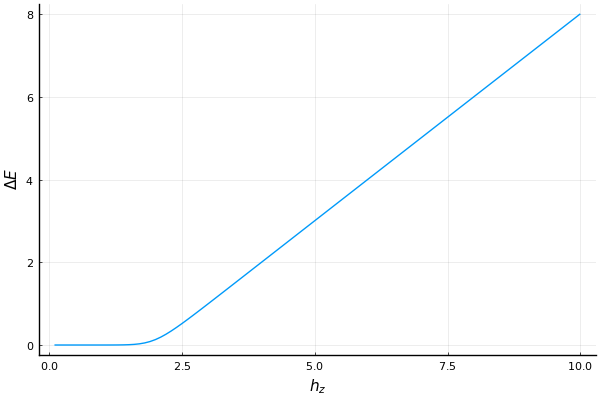

In [9]:
plot(hzs, diffs_lst, legend=false, xlab=L"$h_z$", ylab=L"$\Delta E$")

## Assuming $a/l << 1/2$
In the same setup, we instead take $a = 0.5$. Here we can also obviously observe a phase transition but not between the transition there is obviously a chaotic region. This might be explained by some kind of blockade. The strong interaction between a pair let to some kind of chaotic behaviour of the system. If $h_z$ is stopped at this chaotic region, what will happend??

In [10]:
diffs_lst1 = []
@time for hz in hzs
    vals, vecs = generate_eigs(N=12, hx=0, hz=hz, l=4, a=0.5, C6=-1000, gstate=false)
    #println(vals)
    diffs = vals[2]-vals[1]
    append!(diffs_lst1, diffs)
end


 14.749562 seconds (1.37 M allocations: 6.609 GiB, 4.59% gc time, 0.26% compilation time)


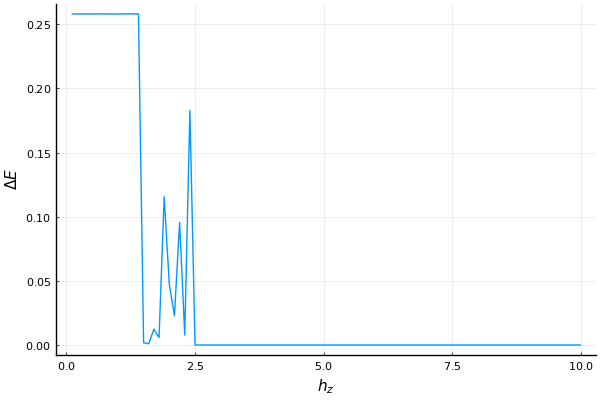

In [11]:
plot(hzs, diffs_lst1, legend=false, xlab=L"$h_z$", ylab=L"$\Delta E$")

## Assuming $a/l$ close to $1$
In the same setup, we here assume $a=3.5$. Like in the previous case, we alse observe a chaotic behavior between the phase transition. One interesting to ask is that how to differentiate between this case and the last case? This question might be answered by the correlation between the first and the last atom, the correlation in both cases should be different. We will next study this difference. Recall that we are in PBC.

In [12]:
diffs_lst2 = []
@time for hz in hzs
    vals, vecs = generate_eigs(N=12, hx=0, hz=hz, l=4, a=3.5, C6=-1000, gstate=false)
    #println(vals)
    diffs = vals[2]-vals[1]
    append!(diffs_lst2, diffs)
end


 13.898192 seconds (1.30 M allocations: 6.605 GiB, 4.64% gc time)


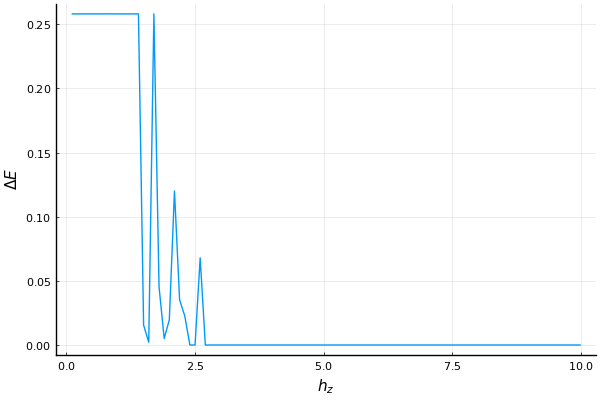

In [13]:
plot(hzs, diffs_lst2, legend=false, xlab=L"$h_z$", ylab=L"$\Delta E$")

# The studies of correlations at chaotic region
So here we notice that the correlation between the first and the last atom when $a=3.5$ has a trend of increasing as $h_z$ increases while the same correlation stays the same at $a=0.5$. This is understandable, because when $a/l$ is close to $1$, this forces the first and the last atom to form a pair therefore results in stronger correlations. 

In [138]:
hzs1 = 0.1:0.1:10
cor_lst1 = []
cor_lst2 = []
@time for hz in hzs1
    _, vec1 = generate_eigs(N=12, hx=0, hz=hz, l=4, a=0.5, C6=-1000, gstate=true)
    _, vec2 = generate_eigs(N=12, hx=0, hz=hz, l=4, a=3.5, C6=-1000, gstate=true)
    cor1 = correlation(i=1,k=11,vec=vec(vec1))
    cor2 = correlation(i=1,k=11, vec=vec(vec2))
    append!(cor_lst1, cor1)
    append!(cor_lst2, cor2)
end

  6.553960 seconds (2.67 M allocations: 13.496 GiB, 10.82% gc time)


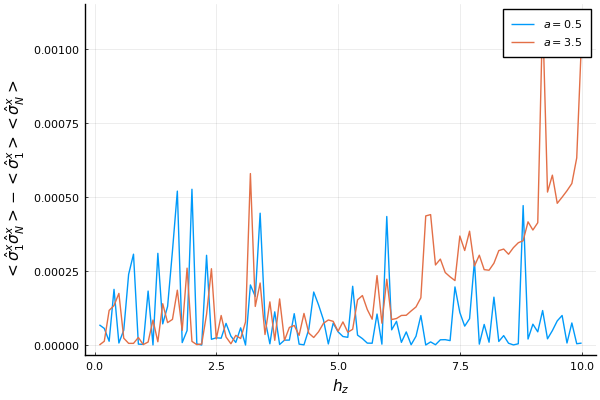

In [139]:
p_cor = plot(xlab=L"$h_z$", ylab=L"$<\hat{\sigma}^x_1\hat{\sigma}^x_N>-<\hat{\sigma}_{1}^{x}><\hat{\sigma}_{N}^{x}>$")
plot!(p_cor, hzs1, cor_lst1, label=L"$a=0.5$")
plot!(p_cor, hzs1, cor_lst2, label=L"$a=3.5$")


# Comparsons between numeric and analytic ground energy $E_0$

## Consider $\Omega \geq 1$
We will first study what effects of increasing z-directional external field $h_z$ (i.e., $\Omega$) will cause the discrepancies between analytic and numeric ground energy. By keeping $C_6=-1$, $a=1.9$ and $l=4$, we vary $\Omega$ with $1$, $5$ and $10$.

In [3]:
Ns = 10:2:20;

In [4]:
f(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=1, N=x);
g(x) = generate_eigs(N=x, hx=0, hz=1, l=4, a=1.9, C6=-1, gstate=true);

f1(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=5, N=x);
g1(x) = generate_eigs(N=x, hx=0, hz=5, l=4, a=1, C6=-1, gstate=true);

f2(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=10, N=x);
g2(x) = generate_eigs(N=x, hx=0, hz=10, l=4, a=1, C6=-1, gstate=true);

In [5]:
fs = [f(N) for N in Ns];
@time gs = [g(N)[1][1] for N in Ns];

fs1 = [f1(N) for N in Ns];
@time gs1 = [g1(N)[1][1] for N in Ns];

fs2 = [f2(N) for N in Ns];
@time gs2 = [g2(N)[1][1] for N in Ns];

 26.669972 seconds (32.05 M allocations: 44.633 GiB, 10.29% gc time, 23.22% compilation time)
 19.652236 seconds (268.01 k allocations: 42.943 GiB, 9.63% gc time, 0.27% compilation time)
 19.734125 seconds (199.34 k allocations: 42.939 GiB, 9.53% gc time, 0.16% compilation time)


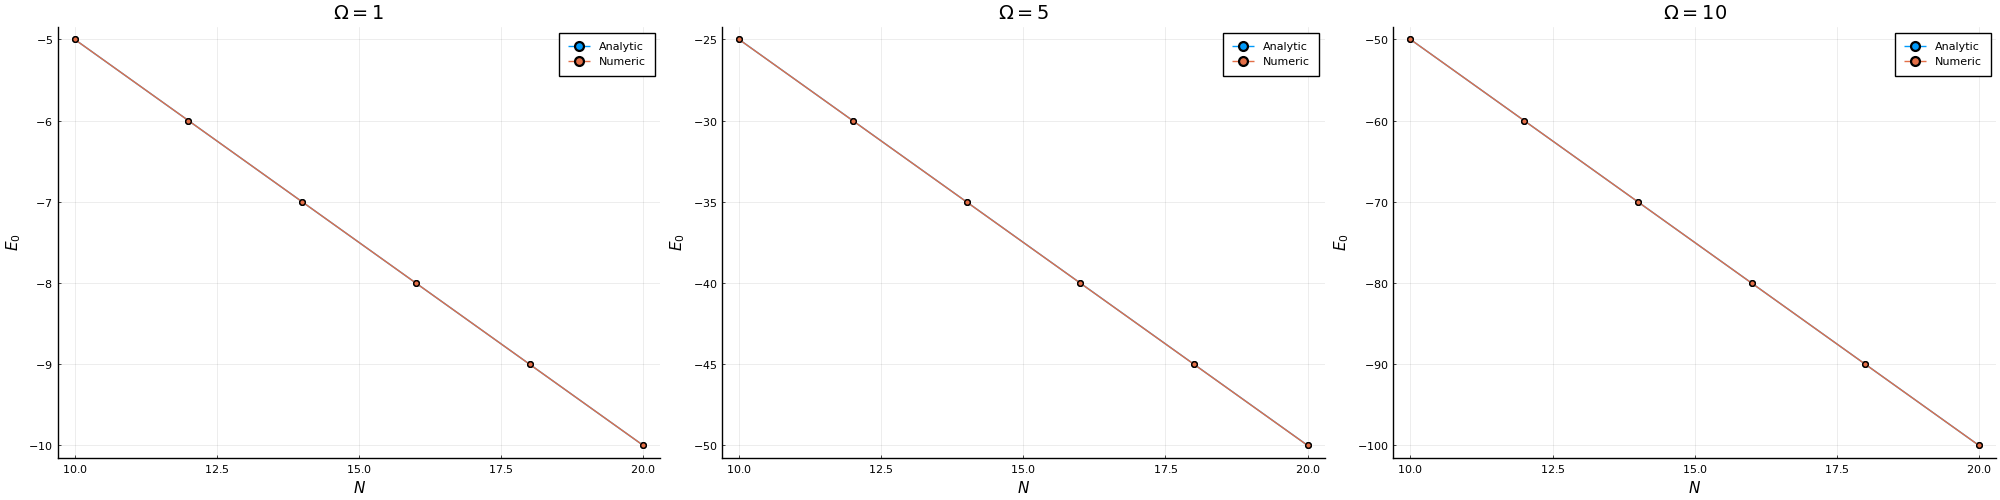

In [7]:
l = @layout [a b c]
p1 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=1$")
p2 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=5$")
p3 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=10$")

plot!(p1, Ns, fs, marker=:circle, label="Analytic")
plot!(p1, Ns, gs, marker=:circle, label="Numeric")
plot!(p2, Ns, fs1, marker=:circle, label="Analytic")
plot!(p2, Ns, gs1, marker=:circle, label="Numeric")
plot!(p3, Ns, fs2, marker=:circle, label="Analytic")
plot!(p3, Ns, gs2, marker=:circle, label="Numeric")
plot(p1, p2, p3, layout=l, size=(2000,500))

We notice here that assuming $\Omega\geq1$, increasing $\Omega$ will not affect the discrepancies between numeric and analytic ground energy. We notice here that the analytic calculation matches perfectly with numerical simulations.

## Consider $\Omega < 1$
In the same setup as above, by setting $C_6=-1$, $a=1.9$ and $l=4$, we vary $\Omega$ with $0.1$, $0.5$ and $0.9$.

In [121]:
f3(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=0.1, N=x);
g3(x) = generate_eigs(N=x, hx=0, hz=0.01, l=4, a=1.9, C6=-1, gstate=true);

f4(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=0.5, N=x);
g4(x) = generate_eigs(N=x, hx=0, hz=0.05, l=4, a=1, C6=-1, gstate=true);

f5(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=0.9, N=x);
g5(x) = generate_eigs(N=x, hx=0, hz=0.09, l=4, a=1, C6=-1, gstate=true);

In [122]:
fs3 = [f3(N) for N in Ns];
@time gs3 = [g3(N)[1][1] for N in Ns];

fs4 = [f4(N) for N in Ns];
@time gs4 = [g4(N)[1][1] for N in Ns];

fs5 = [f5(N) for N in Ns];
@time gs5 = [g5(N)[1][1] for N in Ns];

 24.105043 seconds (199.38 k allocations: 42.939 GiB, 5.92% gc time, 0.08% compilation time)
 28.487654 seconds (199.44 k allocations: 42.939 GiB, 4.27% gc time, 0.16% compilation time)
 23.519358 seconds (199.39 k allocations: 42.939 GiB, 5.02% gc time, 0.11% compilation time)


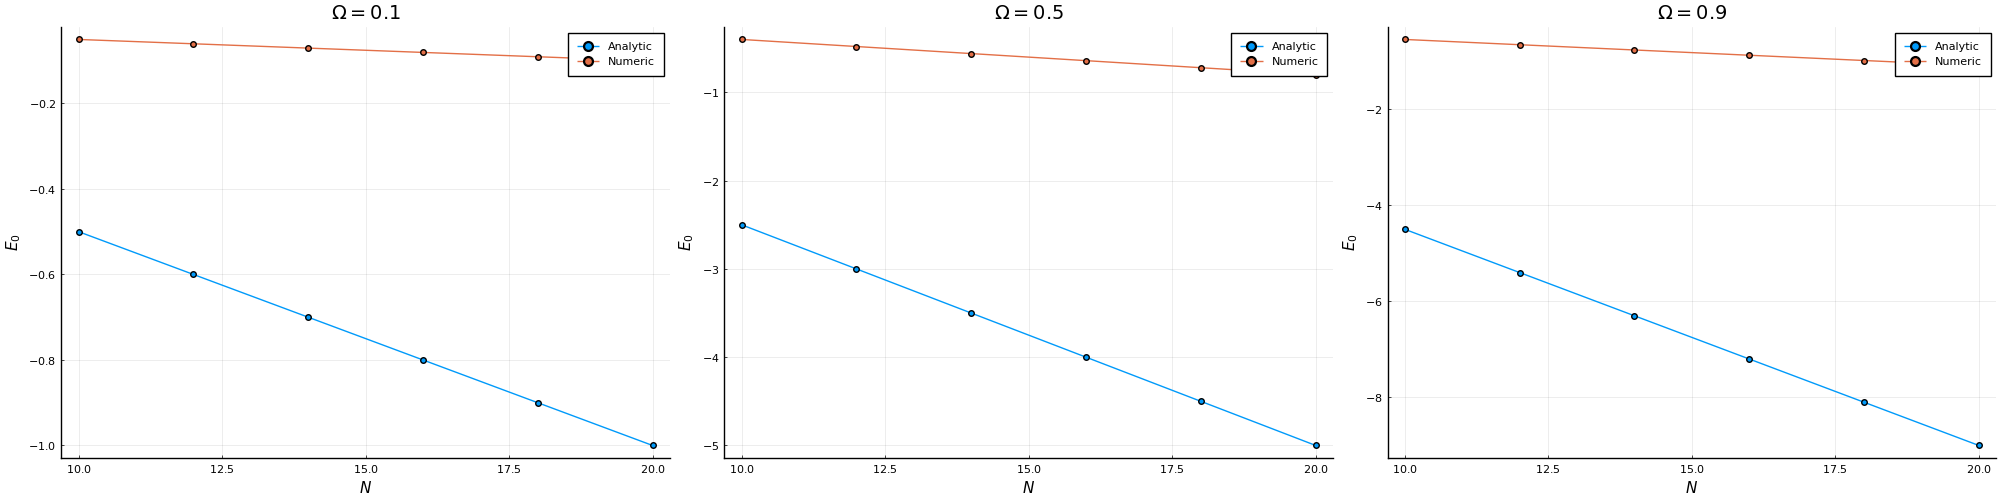

In [123]:
l = @layout [a b c]
p4 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=0.1$")
p5 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=0.5$")
p6 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=0.9$")

plot!(p4, Ns, fs3, marker=:circle, label="Analytic")
plot!(p4, Ns, gs3, marker=:circle, label="Numeric")
plot!(p5, Ns, fs4, marker=:circle, label="Analytic")
plot!(p5, Ns, gs4, marker=:circle, label="Numeric")
plot!(p6, Ns, fs5, marker=:circle, label="Analytic")
plot!(p6, Ns, gs5, marker=:circle, label="Numeric")
plot(p4, p5, p6, layout=l, size=(2000,500))

we notice here that as $\Omega < 1$, the discrepancies between numerical and analytical calculations diverge as $N$ increases.

## Plot with respect to $a$
We notice that the ground state energy is sensiable to the distance $a$, as we can see below.

### Assuming $\Omega << 1$
Here, we set $C_6=-1000$, $l=10$ and $\Omega=0.04$

In [124]:
f6(x) = global_ground_energy(;v1=-1000/x^6, v2=-1000/(10-x)^6, v3=-1000/10^6, Ω=0.04, N=16);
g6(x) = generate_eigs(N=16, hx=0, hz=0.04, l=10, a=x, C6=-1000, gstate=true);

In [125]:
as = 1:0.1:5;

fs6 = [f6(a) for a in as];
gs6 = [g6(a)[1][1] for a in as];

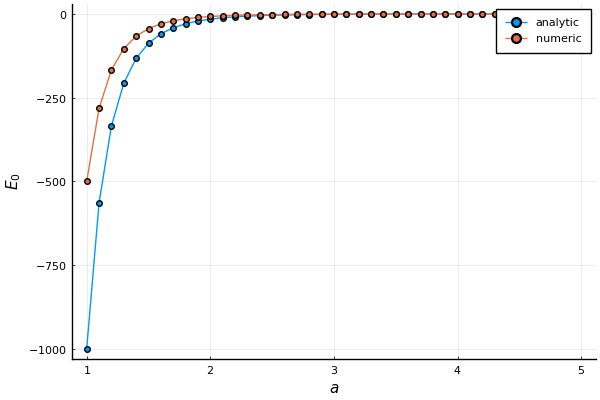

In [126]:
p7 = plot(xlab=L"$a$", ylab=L"$E_0$")
plot!(p7, as, fs6, marker=:circle, label="analytic")
plot!(p7, as, gs6, marker=:circle, label="numeric")

### Assuming $\Omega > 1$
Here, we set $C_6=-100000$, $l=10$ and $\Omega=4$

In [127]:
f7(x) = global_ground_energy(;v1=-100000/x^6, v2=-100000/(10-x)^6, v3=-100000/10^6, Ω=4, N=16);
g7(x) = generate_eigs(N=16, hx=0, hz=4, l=10, a=x, C6=-100000, gstate=true);

In [128]:
@time fs7 = [f7(a) for a in as];
@time gs7 = [g7(a)[1][1] for a in as];

  0.085891 seconds (139.27 k allocations: 7.488 MiB, 99.22% compilation time)
 38.761358 seconds (1.06 M allocations: 63.030 GiB, 3.89% gc time, 0.05% compilation time)


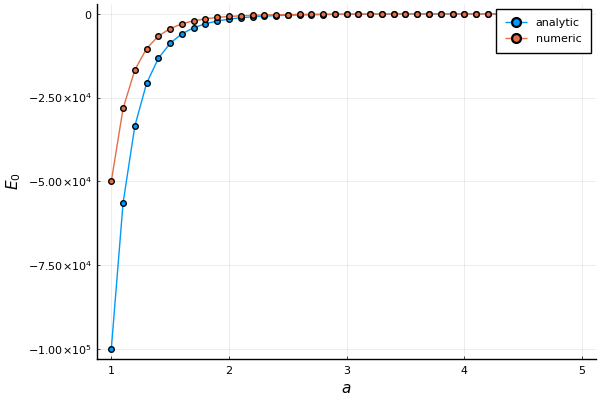

In [129]:
p8 = plot(xlab=L"$a$", ylab=L"$E_0$")
plot!(p8, as, fs7, marker=:circle, label="analytic")
plot!(p8, as, gs7, marker=:circle, label="numeric")

### Assuming $l$ is larger
Here, we set $C_6=-1000000$, $l=20$ and $\Omega=4$

In [130]:
f8(x) = global_ground_energy(;v1=-1000000/x^6, v2=-1000000/(20-x)^6, v3=-1000000/20^6, Ω=4, N=16);
g8(x) = generate_eigs(N=16, hx=0, hz=4, l=20, a=x, C6=-1000000, gstate=true);

In [131]:
as1 = 1:0.2:10
@time fs8 = [f8(a) for a in as1];
@time gs8 = [g8(a)[1][1] for a in as1];

  0.081316 seconds (139.28 k allocations: 7.487 MiB, 98.99% compilation time)
 36.756041 seconds (1.17 M allocations: 70.716 GiB, 4.36% gc time, 0.06% compilation time)


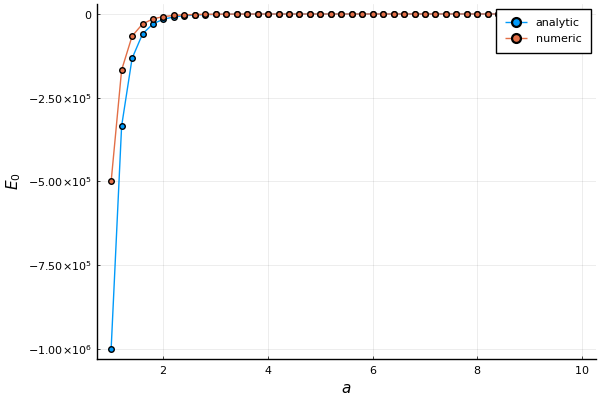

In [132]:
p9 = plot(xlab=L"$a$", ylab=L"$E_0$")
plot!(p9, as1, fs8, marker=:circle, label="analytic")
plot!(p9, as1, gs8, marker=:circle, label="numeric")

## Plot with respect to $l$
In this case, we assume $a=2.5$, $C_6=-1000$ and $\Omega=5$ and we run $l$ from $4$ to $10$.

In [133]:
f9(x) = global_ground_energy(;v1=-1000/2.5^6, v2=-1000/(x-2.5)^6, v3=-1000/x^6, Ω=5, N=16);
g9(x) = generate_eigs(N=16, hx=0, hz=5, l=x, a=2.5, C6=-1000, gstate=true);

In [134]:
ls = 4:0.2:10
@time fs9 = [f9(l) for l in ls];
@time gs9 = [g9(l)[1][1] for l in ls];

  0.063793 seconds (113.24 k allocations: 5.939 MiB, 99.24% compilation time)
 19.446911 seconds (885.01 k allocations: 47.661 GiB, 5.28% gc time, 0.19% compilation time)


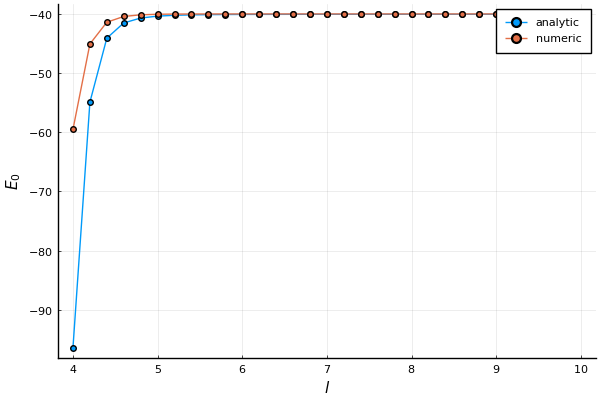

In [135]:
p10 = plot(xlab=L"$l$", ylab=L"$E_0$")
plot!(p10, ls, fs9, marker=:circle, label="analytic")
plot!(p10, ls, gs9, marker=:circle, label="numeric")